In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [15]:
#mesmo modelo usando statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
boston =load_boston()
type(boston)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
#Cria Dataframe
df_boston = pd.DataFrame(data = boston['data'],columns=boston['feature_names'])

In [5]:
#aciona a variavel Target
df_boston['MEDV'] = boston['target']

In [6]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Num delinhas e colunas 
df_boston.shape

(506, 14)

### Em um modelo de regressão,estamos a principio<br> interessado em algumas questoẽs:<br>
1- Há pelo menos uma unica variavel util para prever a variavel target?<br>
2- Todas as variaveis do arquivo ajudam a prever a variavel target?<br>
3- O modelo se ajusta bem aos dados? Quanto?<br>
4- Qual o valor do target devemos prever? e qual é a precisão da nossa previsão

In [8]:
#verificando tipo de dado em cada coluna
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
sns.set(style='whitegrid',context='notebook',color_codes=True)

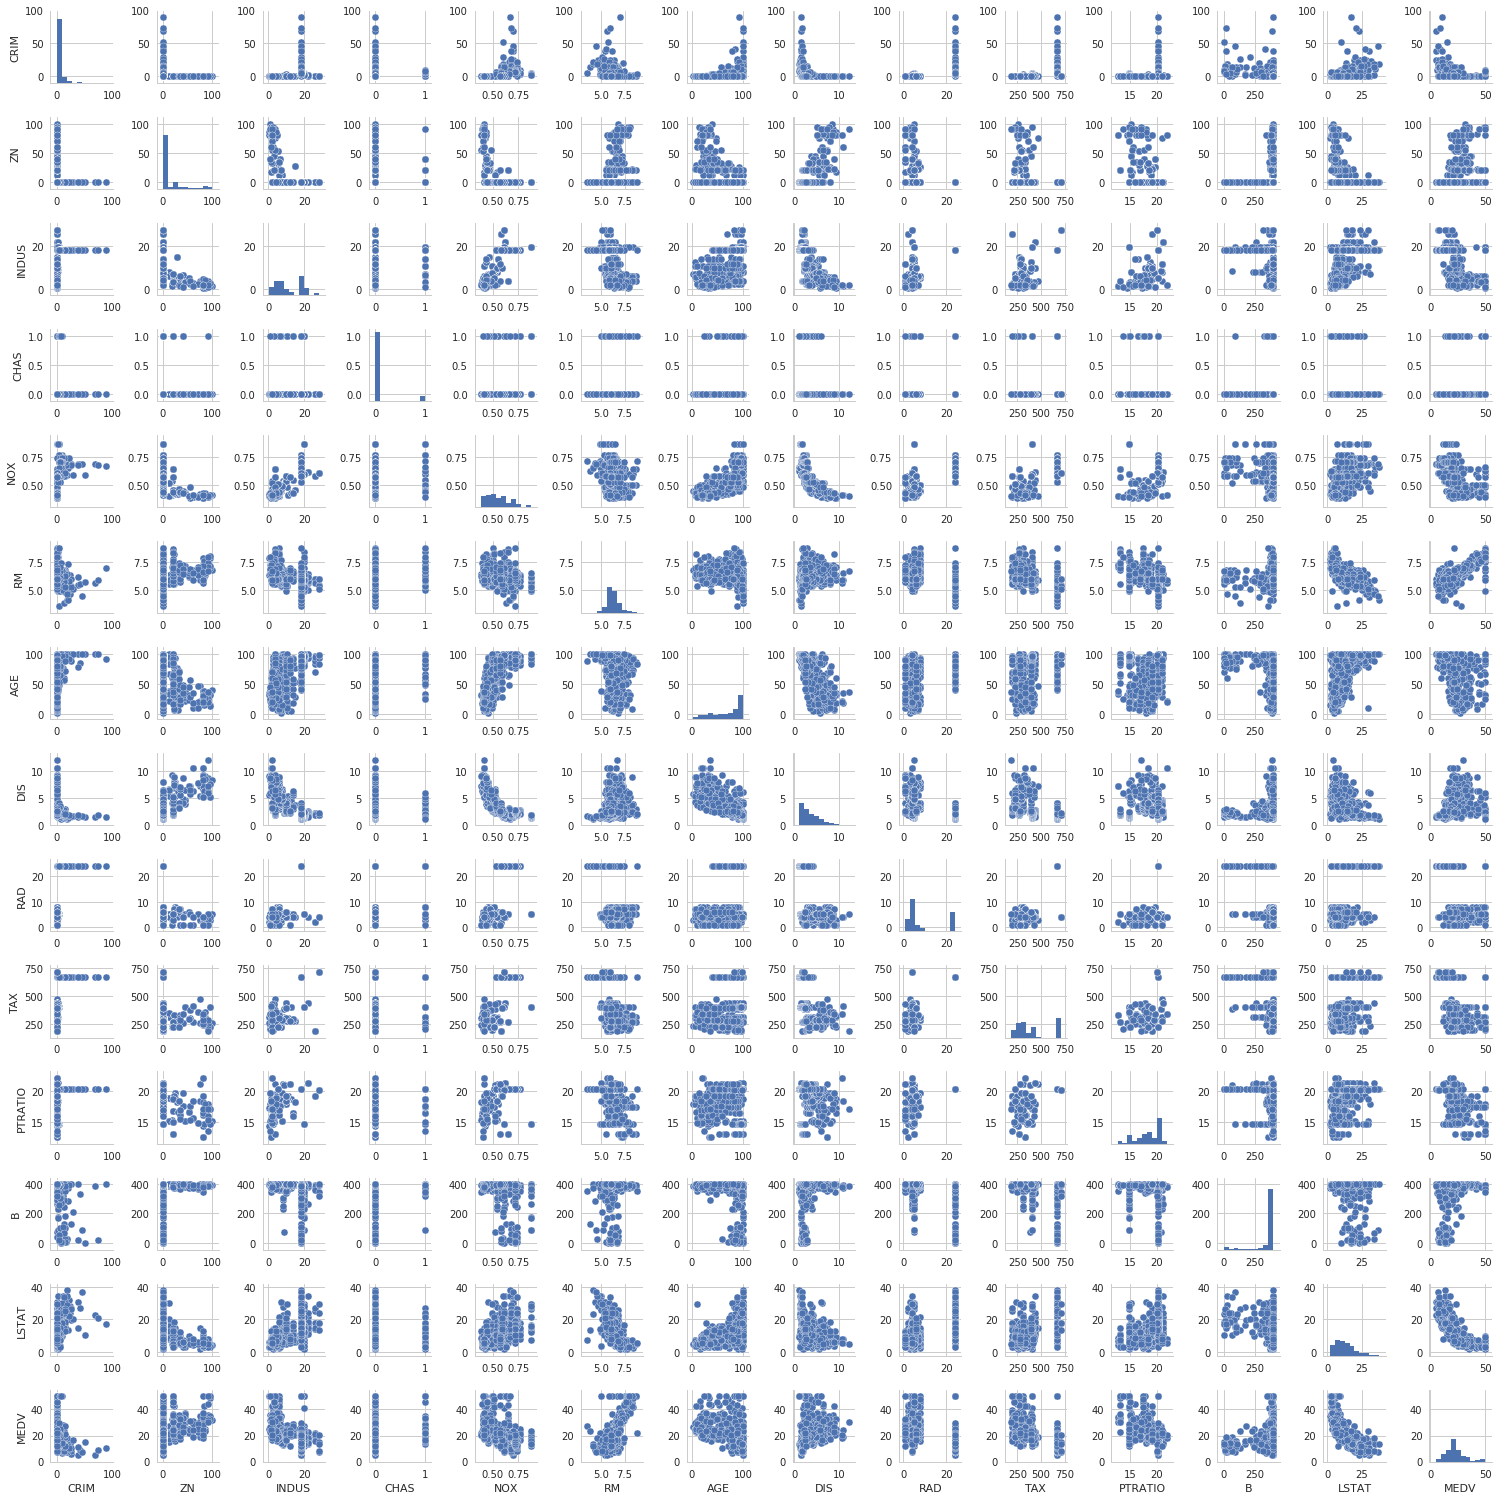

In [30]:
# Criando scatterplot matrix
sns.pairplot(df_boston,size=1.5)
plt.show()

In [10]:
plt.rcParams["figure.figsize"] = (18,12)

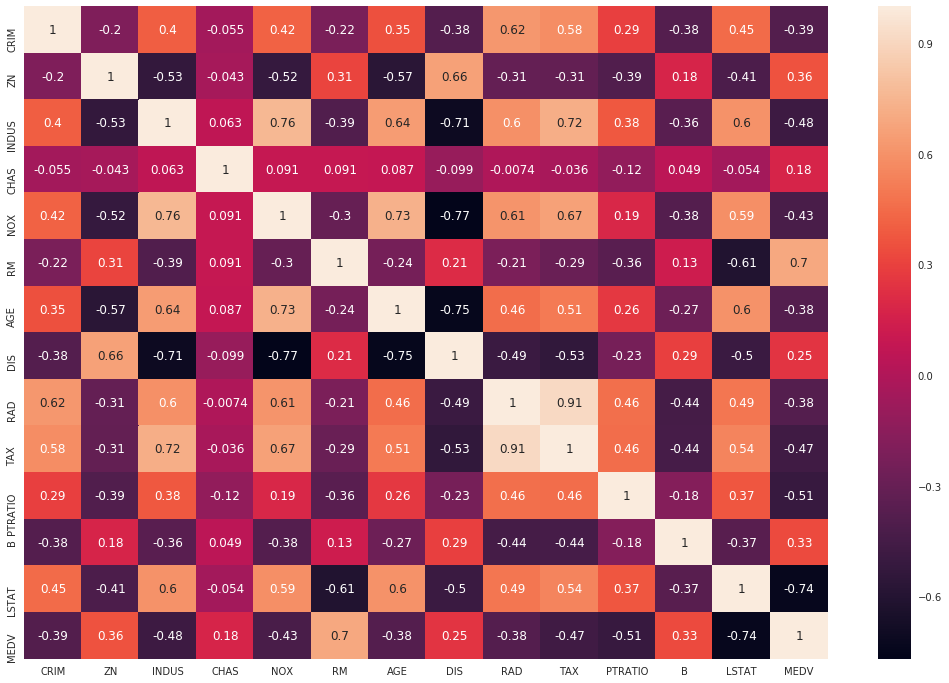

In [33]:
#verificando correlaçao com heatmap
corr = df_boston.corr()

sns.heatmap(corr,annot=True)

#### Respondendo a questão 1.
Há relacionamento entre pelo menos uma variavel preditora e a variavel target.<br>
Agora precisamos saber se esse relacionamento é linear ou não

In [11]:
#treinando o modelo com todas as variaveis
X = df_boston.drop('MEDV',axis=1)
Y = df_boston['MEDV']

In [12]:
#dividindo os dados em teste e treino
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [17]:
#treinando modelo usando statmodels
X_train_cond = sm.add_constant(X_train)
model= sm.OLS(y_train,X_train_cond).fit()

### Ridge regression
### Aumentando o valor do paramentro, diminui o numero de coeficientes significativos para o modelo
### tendencia aumentar o bias e diminuir a variance

In [56]:
#usando ridgeregression
#1e-3, 1e-2, 1e-1, 1
clf = RidgeCV(alphas=[1e-3],normalize=True).fit(X_train, y_train)
clf.score(X_train, y_train) 

0.74190159506829734

In [55]:
clf.get_params()

{'alphas': [0.001, 0.01, 0.1],
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': True,
 'scoring': None,
 'store_cv_values': False}

In [57]:
#melhor parametro 
clf.alpha_

0.001

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     75.18
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           1.41e-91
Time:                        23:02:32   Log-Likelihood:                -1052.8
No. Observations:                 354   AIC:                             2134.
Df Residuals:                     340   BIC:                             2188.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.7450      6.473      4.441      0.000      16.013      41.477
CRIM          -0.1289      0.036     -3.540      0.000      -0.201      -0.057
ZN             0.0463      0.017      2.676      0.008       0.012       0.080
INDUS         -0.0542      0.076     -0.712      0.477      -0.204       0.095
CHAS           3.8321      1.035      3.704      0.000       1.797       5.867
NOX          -12.4515      4.705     -2.646      0.009     -21.707      -3.196
RM             3.7279      0.524      7.109      0.000       2.696       4.759
AGE            0.0074      0.016      0.454      0.650      -0.025       0.039
DIS           -1.1955      0.235     -5.087      0.000      -1.658      -0.733
RAD            0.2802      0.079      3.548      0.000       0.125       0.435
TAX           -0.0078      0.005     -1.705      0.089      -0.017       0.001
PTRATIO       -0.8271      0.162     -5.093      0.000      -1.147      -0.508
B              0.0125      0.003      3.772      0.000       0.006       0.019
LSTAT         -0.5566      0.062     -8.954      0.000      -0.679      -0.434
==============================================================================
Omnibus:                      129.101   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.353
Skew:                           1.530   Prob(JB):                    3.11e-120
Kurtosis:                       8.287   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""